<a href="https://colab.research.google.com/github/KatiaKudinova/Data-analysis-with-Python/blob/main/Data%20Visualization%20with%20Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
/content/drive/MyDrive/DA Python
   order_date      time  aging  customer_id gender device_type  \
0  2018-01-01  10:11:40    5.0        29317   Male         Web   
1  2018-01-01  22:30:44    7.0        42270   Male         Web   
2  2018-01-01  21:55:31   10.0        14563   Male         Web   
3  2018-01-01  13:57:15    9.0        58601   Male         Web   
4  2018-01-01  15:17:41    2.0        48342   Male         Web   

  customer_login_type    product_category                 product  sales  \
0              Member  Auto & Accessories       Car Media Players  140.0   
1              Member  Auto & Accessories  Car Pillow & Neck Rest  231.0   
2              Member  Auto & Accessories            Car Speakers  211.0   
3              Member  Auto & Accessories                    Tyre  250.0   
4              Member  Auto & Accessories                    Tyre  250.0   

   quantity  discount  profit  shipping_cost order_priority payment_method  
0       4.

Text(0, 0.5, 'Частота зустрічання')

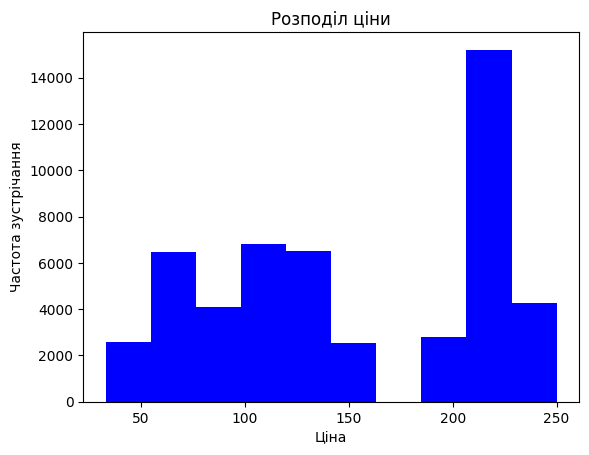

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DA Python
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
df = pd.read_csv("sales_data_updated (1).csv")
print(df.head())
# print(df.describe())
plt.hist(df["sales"], bins=10, color="blue")
plt.title("Розподіл ціни")
plt.xlabel("Ціна")
plt.ylabel("Частота зустрічання")

На графіку розподілу ціни продажу (sales) чітко видно що найчастіше зустрічається ціна в діапазоні 200-250, найбільша ціна продажу - 250, а найменша трохи менше 50.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51290 non-null  object 
 1   time                 51290 non-null  object 
 2   aging                51289 non-null  float64
 3   customer_id          51290 non-null  int64  
 4   gender               51290 non-null  object 
 5   device_type          51290 non-null  object 
 6   customer_login_type  51290 non-null  object 
 7   product_category     51290 non-null  object 
 8   product              51290 non-null  object 
 9   sales                51289 non-null  float64
 10  quantity             51288 non-null  float64
 11  discount             51289 non-null  float64
 12  profit               51290 non-null  float64
 13  shipping_cost        51289 non-null  float64
 14  order_priority       51288 non-null  object 
 15  payment_method       51290 non-null 

Text(0, 0.5, 'Сума продажів')

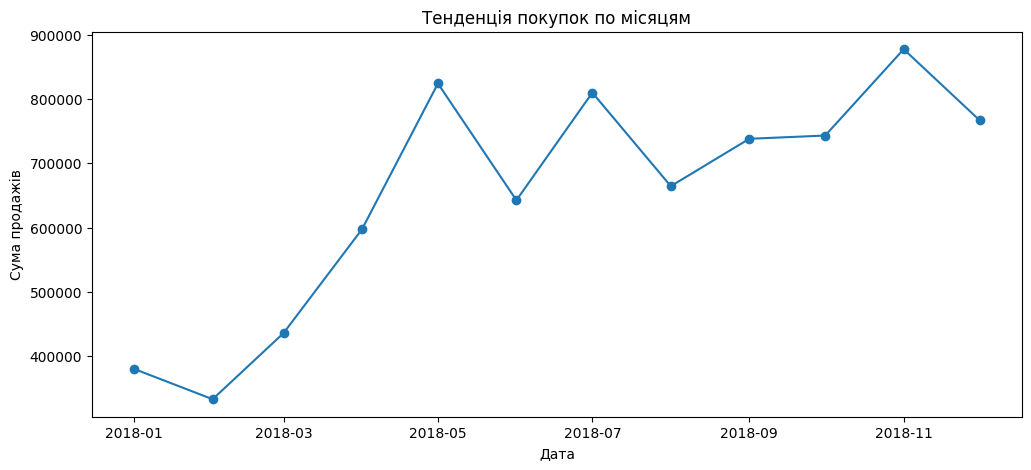

In [2]:
print(df.info())
df["order_date"] = pd.to_datetime(df["order_date"])
df["order_month"] = df["order_date"].dt.to_period("M").dt.to_timestamp()
monthly_sales = df.groupby("order_month")["sales"].sum().reset_index()
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["order_month"], monthly_sales["sales"], marker="o")
plt.title("Тенденція покупок по місяцям")
plt.xlabel("Дата")
plt.ylabel("Сума продажів")




Згідно з графіком у період з лютого 2018 року спостерігається тенденція до зростання місячного продажу товарів, з травня 2018 року графік є неоднорідним і продажі показуть зростання та спадання хвилями. З серпня 2018 по листопад 2018 року продажі зростали, після чого пішли на спад.

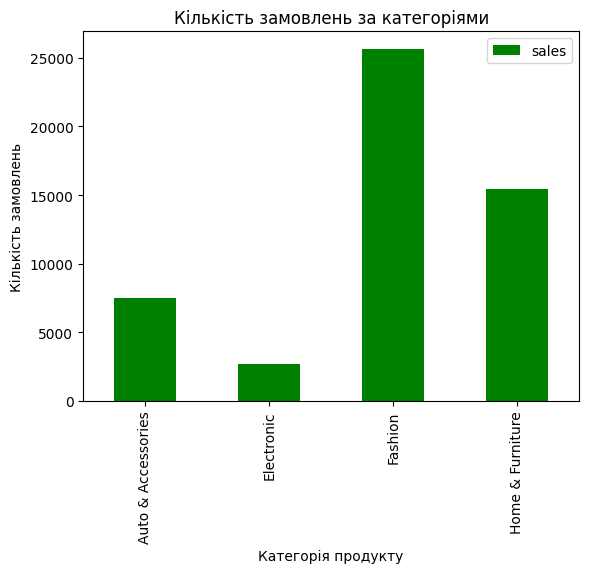

In [3]:
category_group = df.groupby("product_category")["sales"].count().reset_index().plot(kind="bar", x="product_category", y="sales", color="green")
plt.title("Кількість замовлень за категоріями")
plt.xlabel("Категорія продукту")
plt.ylabel("Кількість замовлень")
plt.show()

Найбільш популярною є категорія Fasion, а найменшпопулярною - Electronic

Створи діаграму розсіювання для візуалізації взаємозв'язку між прибутком (profit) та загальною сумою продажу (sales). Подумай, чи є зв'язок між цими показниками і який характер цього взаємозв'язку.

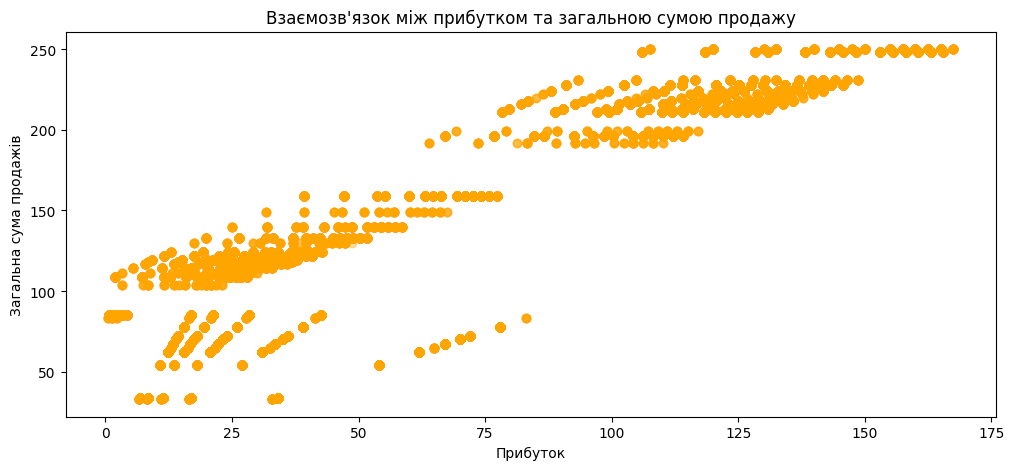

In [4]:
plt.figure(figsize=(12, 5))
plt.scatter(df["profit"], df["sales"], color="orange", alpha=0.2)
# plt.figure(figsize=(12, 5))
plt.title("Взаємозв'язoк між прибутком та загальною сумою продажу")
plt.xlabel("Прибуток")
plt.ylabel("Загальна сума продажів")
plt.show()


Зі зростанням кількості продажів зростає і прибуток, що свідчить про пряму залежність між цими показниками.

Створи масив графіків (2x2) з попередніх візуалізацій, щоб на одному малюнку побачити всі графіки та порівняти їх.

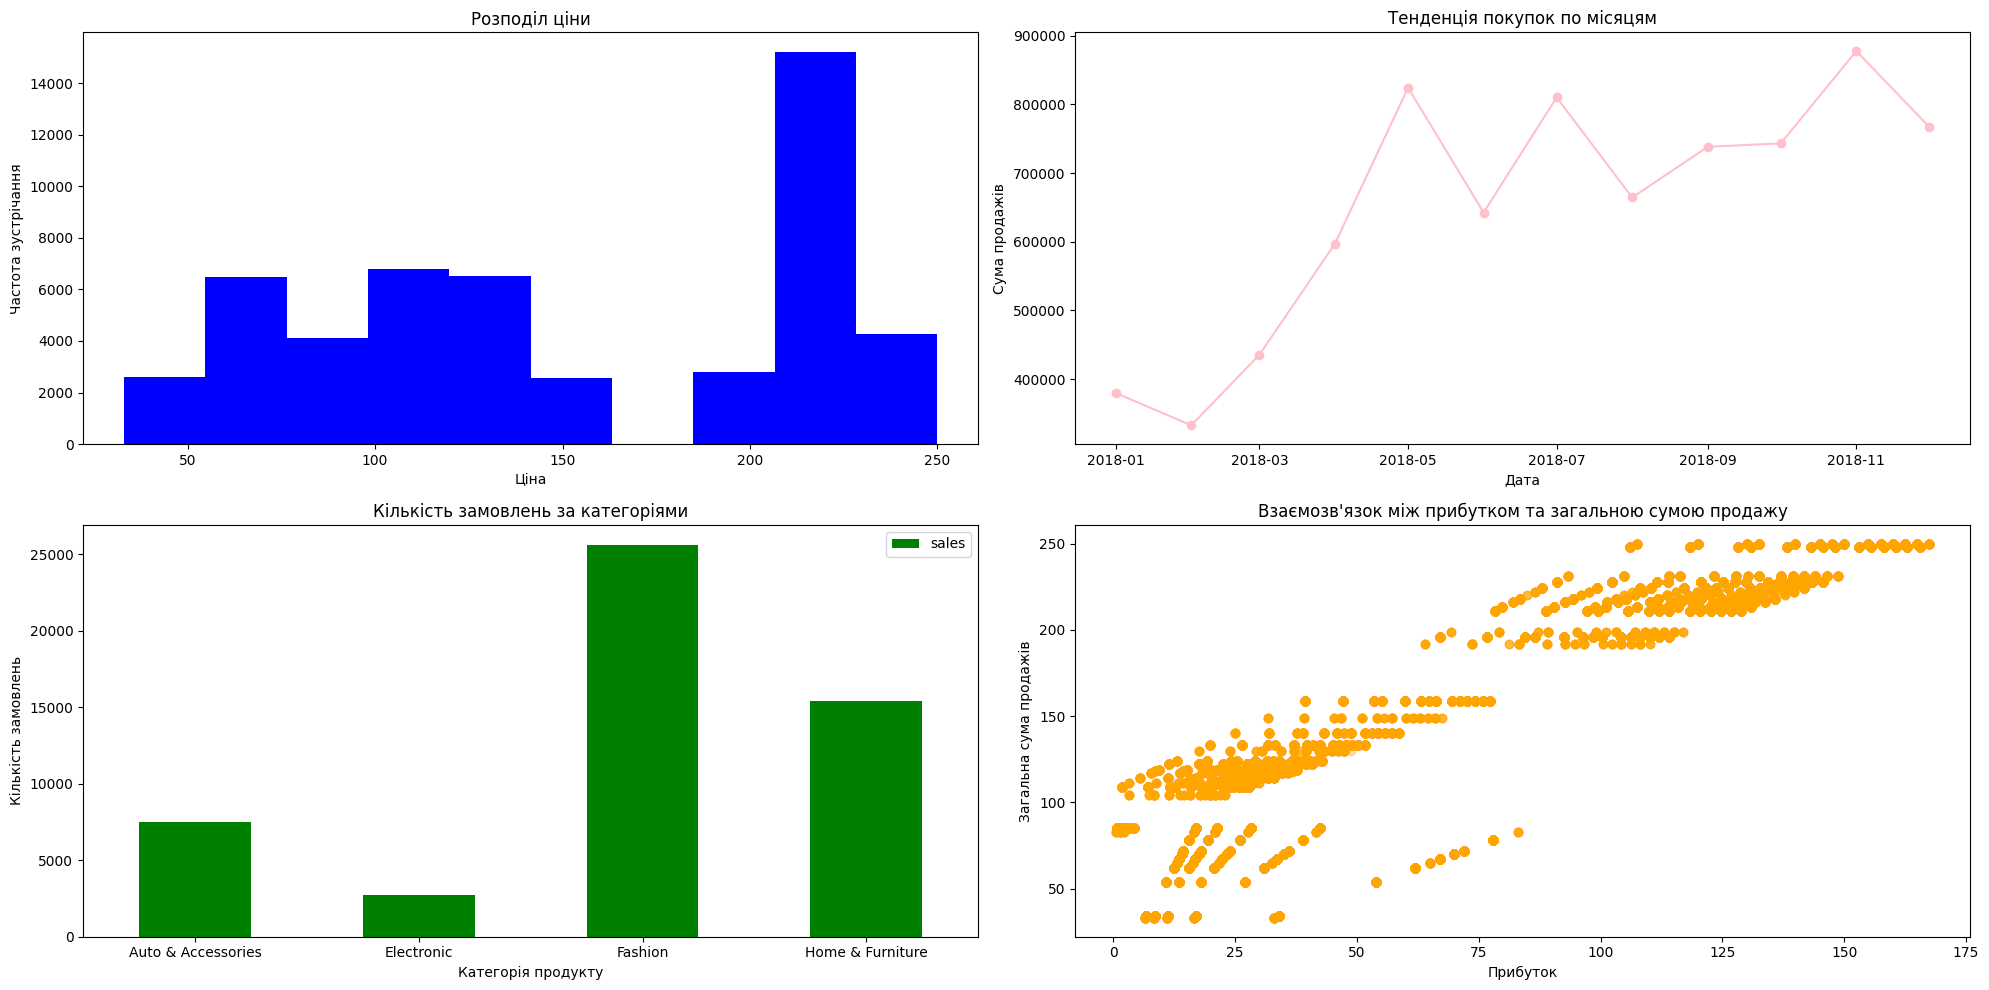

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].hist(df["sales"], bins=10, color="blue")
ax[0, 0].set_title("Розподіл ціни")
ax[0, 0].set_xlabel("Ціна")
ax[0, 0].set_ylabel("Частота зустрічання")

df["order_date"] = pd.to_datetime(df["order_date"])
df["order_month"] = df["order_date"].dt.to_period("M").dt.to_timestamp()
monthly_sales = df.groupby("order_month")["sales"].sum().reset_index()
ax[0, 1].plot(monthly_sales["order_month"], monthly_sales["sales"], marker="o", color="pink")
ax[0, 1].set_title("Тенденція покупок по місяцям")
ax[0, 1].set_xlabel("Дата")
ax[0, 1].set_ylabel("Сума продажів")

category_group = df.groupby("product_category")["sales"].count().reset_index().plot(kind="bar", x="product_category", y="sales", ax=ax[1, 0], color="green")
ax[1, 0].set_title("Кількість замовлень за категоріями")
ax[1, 0].set_xlabel("Категорія продукту")
ax[1, 0].set_ylabel("Кількість замовлень")
ax[1, 0].tick_params(axis="x", rotation=0)

ax[1, 1].scatter(df["profit"], df["sales"], color="orange", alpha=0.2)
ax[1, 1].set_title("Взаємозв'язoк між прибутком та загальною сумою продажу")
ax[1, 1].set_xlabel("Прибуток")
ax[1, 1].set_ylabel("Загальна сума продажів")

plt.tight_layout()

plt.show()